In [121]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Q2
## Multi-class classification for MNIST data set, comparison

This question is to compare different classifiers and their performance for multi-class classifications
on the complete MNIST dataset at http://yann.lecun.com/exdb/mnist/. You can find the data
1file mnist 10digits.mat in the homework folder. The MNIST database of handwritten digits has a
training set of 60,000 examples, and a test set of 10,000 examples. We will compare KNN, logistic
regression, SVM, kernel SVM, and neural networks. We suggest to use Scikit-learn, which is
a commonly-used and powerful Python library with various machine learning tools. But you can also
use other similar libraries in other programming languages of your choice to perform the tasks. Below
are some tips.
* We suggest you to “standardize” the features before training the classifiers, by dividing the values of the features by 255 (thus map the range of the features from [0, 255] to [0, 1]).
* You may adjust the number of neighbors K used in KNN to have a reasonable result (you may use cross validation but it is not required; any reasonable tuning to get good result is acceptable).
* You may use a neural networks function sklearn.neural network with hidden layer sizes = (20, 10).
* For kernel SVM, you may use radial basis function kernel, and a heuristic called "median trick": choose the parameter of the kernel $K(x,x') = exp{-||x - x'||^2 / (2\sigma^2)}$. Choose the bandwidth as $\sigma = \sqrt{M/2}$ where M = the median of ${||x^i - x^j||^2, 1 \leq i, j\leq m', i \neq j}$ for pairs of training samples. Here you can randomly choose m' = 1000 samples from training data to use for the "median trick"
* For KNN and SVM, you can randomly downsample the training data to size m = 5000, to improve
computation efficiency.
Train the classifiers on training dataset and evaluate on the test dataset.

In [2]:
data = loadmat('mnist_10digits.mat')

In [8]:
X_train = data['xtrain'] / 255
y_train = data['ytrain'].reshape(-1,)
X_test = data['xtest'] / 255
y_test = data['ytest'].reshape(-1,)

In [9]:
print('X-train shape: {}\nX-test shape: {}'.format(X_train.shape, X_test.shape))
print('y-train shape: {}\ny-test shape: {}'.format(y_train.shape, y_test.shape))

X-train shape: (60000, 784)
X-test shape: (10000, 784)
y-train shape: (60000,)
y-test shape: (10000,)


In [11]:
def evaluate(clf, xtest, ytest, savefig):
    
    predict = clf.predict(xtest)
    
    acc = accuracy_score(ytest, predict)
    
    cm = confusion_matrix(ytest, predict)
    
    prfs = precision_recall_fscore_support(ytest, predict)
    
    plt.figure(figsize=(15,8))
    sns.heatmap(cm, cmap='Blues', annot=True)
    plt.title('Confusion Matrix ({})'.format(savefig))
    plt.savefig('cm_{}'.format(savefig), bbox_layout='tight', bbox_inches='tight')
    plt.show()
    
    plt.figure(figsize=(15,8))
    sns.heatmap(prfs, annot=True, vmin=0, vmax=1e9, cbar=False)
    plt.yticks(np.arange(4) + 0.5, ['precision', 'recall', 'f-score', 'support'], rotation=0)
    plt.title('Precision - Recall - Fscore ({})'.format(savefig))
    plt.savefig('prf_{}'.format(savefig), bbox_layout='tight', bbox_inches='tight')
    plt.show()

### KNN
-------------

In [14]:
knn_clf = KNN(n_neighbors=10, n_jobs=-1)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=10)

### Logistic Regression
----------------------------

In [16]:
Cs = np.linspace(0.001, 10, 10)

lr_clf = LogisticRegressionCV(Cs=Cs, n_jobs=-1, random_state=42, verbose=False, penalty='l2', cv=5)
lr_clf.fit(X_train, y_train)

best_C = lr_clf.C_[0]

lr_clf = LogisticRegression(C=best_C, random_state=42, penalty='l2')
lr_clf.fit(X_train, y_train)

/home/scott/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/scott/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

LogisticRegression(C=1.1119999999999999, random_state=42)

### Neural Network
--------------------------

In [115]:
mlp = MLPClassifier(hidden_layer_sizes=(20,10), max_iter=5000)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=5000)

### SVM
---------------

In [119]:
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

SVC(kernel='linear')

### SVM Radial Basis
----------------

In [ ]:
Cs = np.logspace(-2,10,10)
gs = np.logspace(-9, 3, 10)
param_grid = dict(gamma=gs, C=Cs)
rbf = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=3)
rbf.fit(X_train, y_train)

#### Report confusion matrix, precision, recall, and F-1 score for each of the classifiers. For precision, recall, and F-1 score of each classifier, we will need to report these for each of the digits. So you can create a table for this. For this question, each of the 5 classifier, KNN, logistic regression, SVM, kernel SVM, and neural networks, accounts for 10 points.

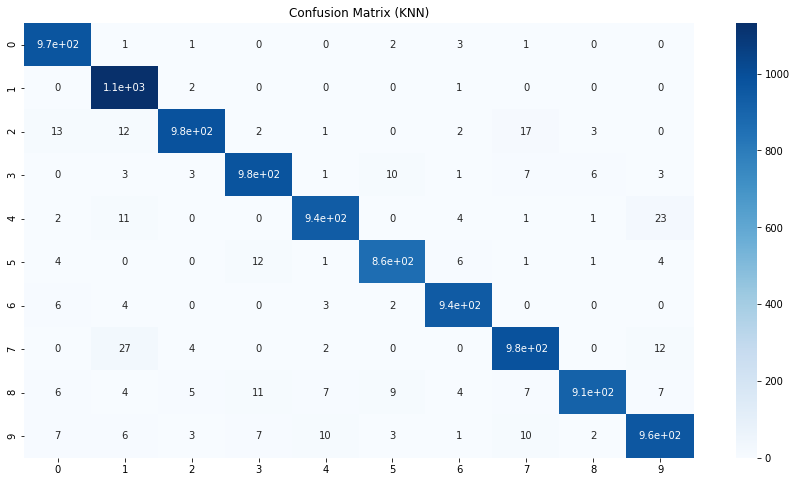

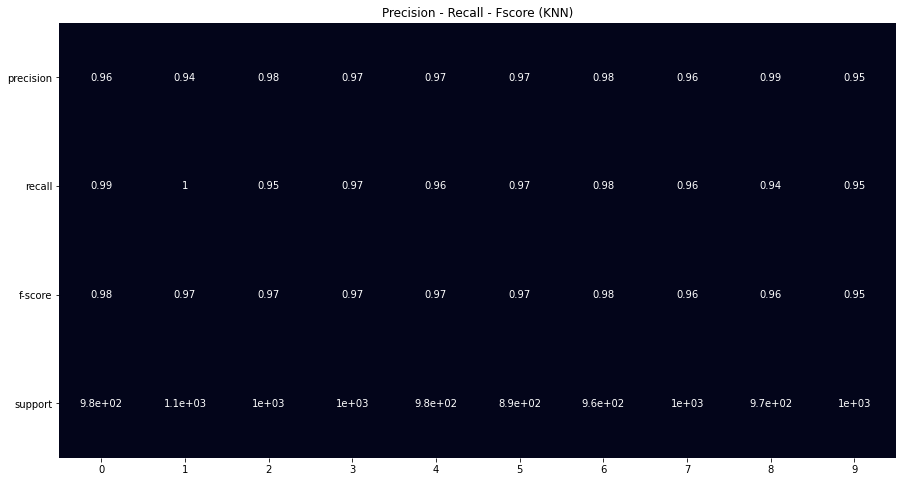

In [15]:
evaluate(knn_clf, X_test, y_test, 'KNN')

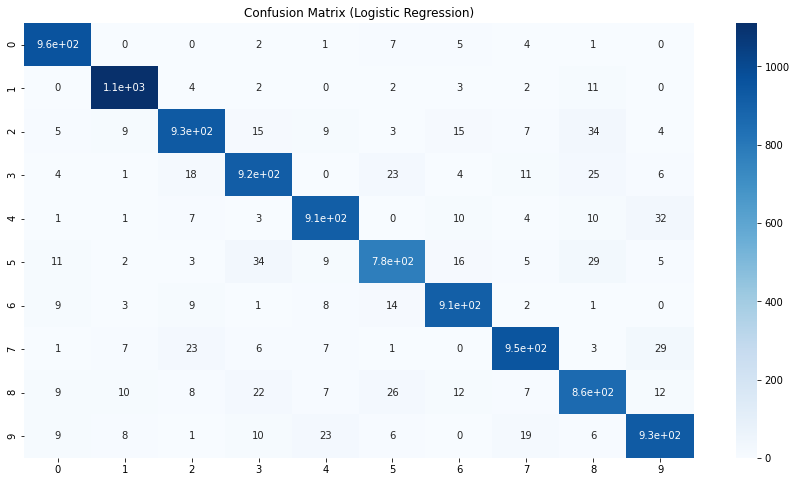

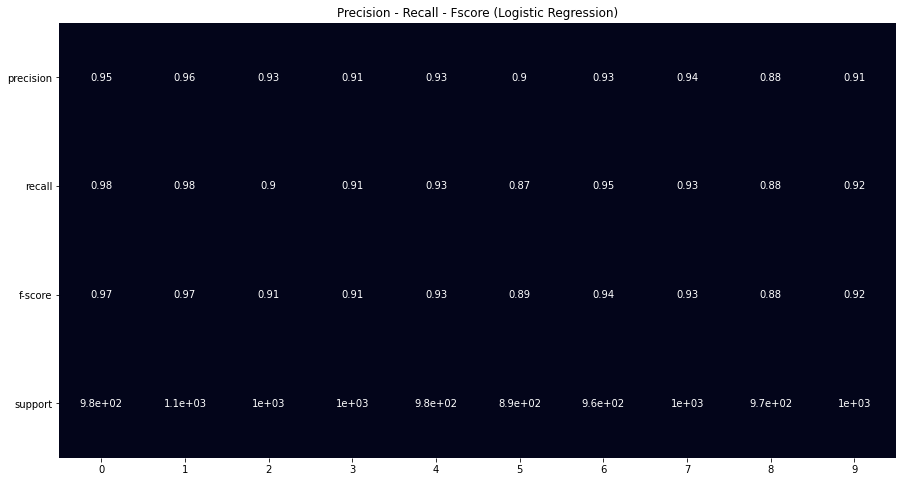

In [17]:
evaluate(lr_clf, X_test, y_test, 'Logistic Regression')

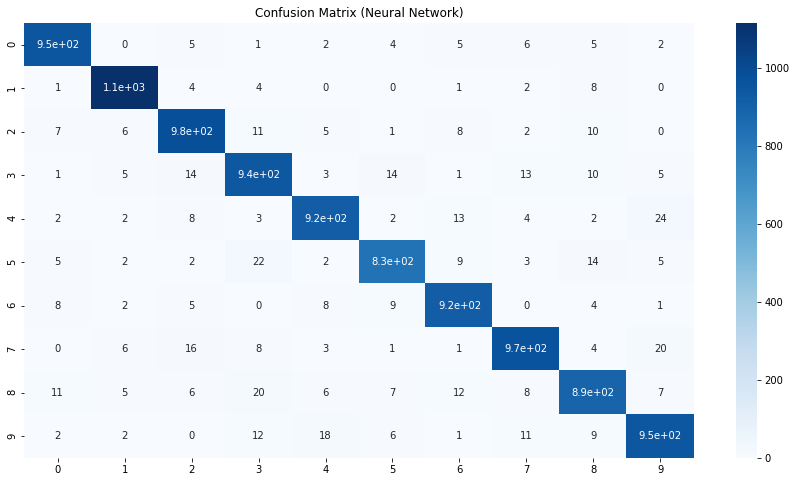

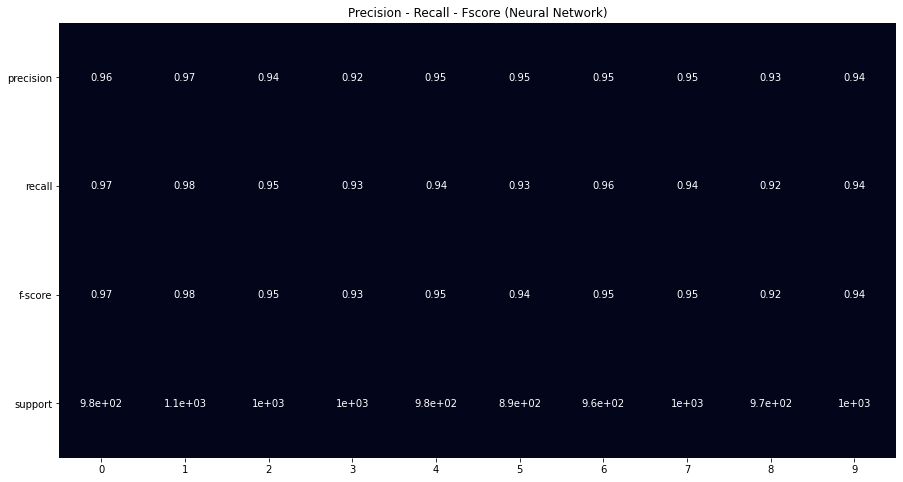

In [116]:
evaluate(mlp, X_test, y_test, 'Neural Network')

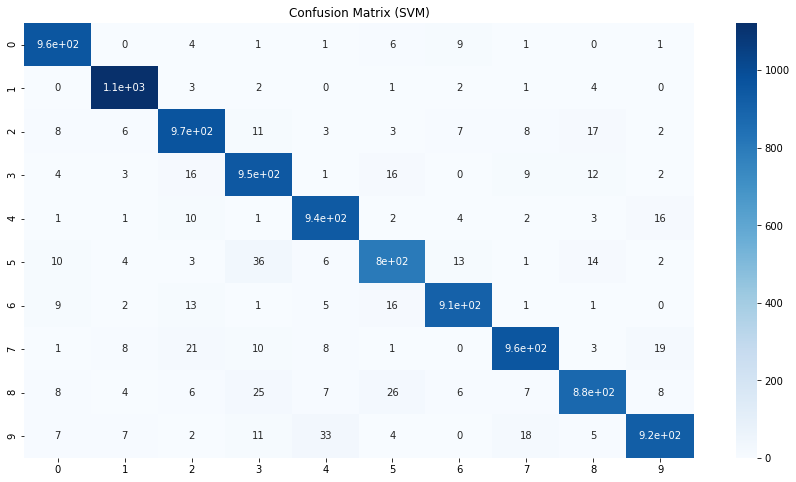

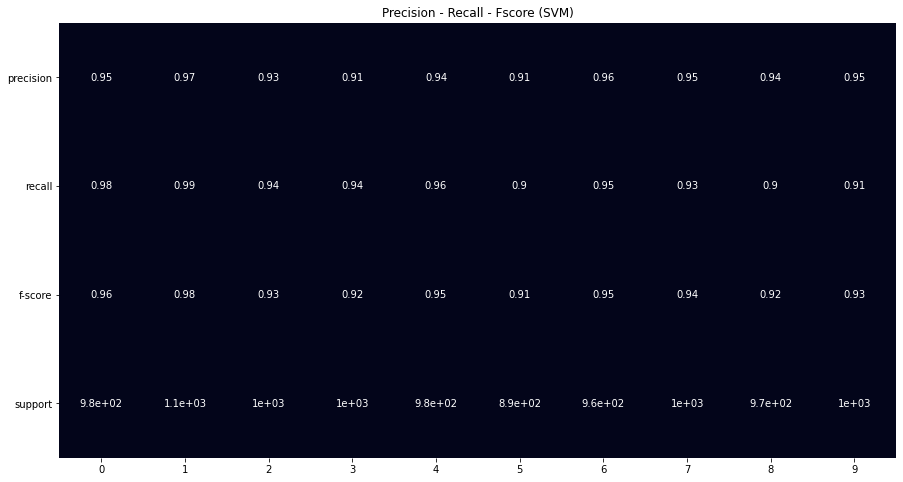

In [120]:
evaluate(svm_clf, X_test, y_test, 'SVM')